In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Question #1:

In [25]:
R = 7*(10**8) #radius of stars in meters
p = 10**9 #density of stars in Mpc^-3

In [29]:
cs = np.pi*(R**2) #cross section of the a star of radius R
print cs #cross section is in m^2

1.53938040026e+18


In [34]:
Mpc2 = 3.086*(10**22) #number of meters in one Mpc
cs2 = cs / (Mpc2**2) #cs2 is cs in Mpc instead of meters
print cs2

1.61641960521e-27


In [35]:
l = 1 / (p*cs2) #l is the mean free path which will give us our final answer
print l

6.18651244254e+17


Therefore the distance at which any line-of-sight will intersect the surface of the star is 6.18 x 10^17 Mpc.

Question #2:

In [12]:
H0 = 70 #today's calculated H0 in km/s/Mpc
H01 = 500 #H0 calculated by Edwin Hubble in km/s/Mpc
c = 299792.458 #units in km/s
z = .002 #example redshift
v = z*c #in km/s
print v

599.584916


In [3]:
D = v / H01 #Distance to Cephied star using Hubbles calculated H0 in Mpc using example redshift
print D

1.199169832


In [22]:
D2 = v / H0 #Distance using todays calculated H0 in Mpc using example redshift
print D2
Dratio = D/D2
print Dratio

8.5654988
0.14


In [5]:
Error = ((D2 - D) / D2)*100 #in percentage
print Error

86.0


This means Hubble had an 86 percentage error in calculating distance

In [11]:
Mpc = 3.086*(10**19) #number of kilometers in one Mpc
H02 = H01/Mpc
print H02

1.62022034997e-17


In [7]:
t = 1 / H02 #age of universe in seconds
print t
tyrs = t / (3.154*(10**7)) #converting seconds to years
print tyrs

6.172e+16
1956880152.19


For an H0 = 500 km/s/Mpc we get the age of the universe to be 1.96 Gyr instead of 13.7. Therefore, to compensate for the extra 11.74 Gyrs, the universe would have to be deccelerating to reach the size it would be at 1.96 Gyrs if the universe were expanding at a constant rate. 

Question #3:
Ryden 3.2

On the surface of a sphere of radius r, the path segment ds is defined by the equation 
ds^2 = dr^2 + R^2 * sin^2(r/R) * dtheta^2. 
In this case theta is the angular width. Because the object is perpendicular to our line of sight in the theta direction, we can ignore dr^2.

We can then take the square root of both sides which gives us ds = Rsin(r/R) * dtheta. Solving for dtheta we get dtheta = ds / [Rsin(r/R)]

Substituting r --> piR we get ds/[Rsin(piR/R)] = ds/[Rsin(pi)] which equals infinity. Therefore as r goes to piR dtheta blows up.

Question #4:

In [13]:
def a2(a,t): #Defining a' which I am calling a2
    result = (H0*a**(-1.5)) #got this equation by just taking the square root of both sides
    return result

t = np.linspace(0, 10, 10000)

solution = odeint(a2, 1, t)

I then solved the equation a' = H0a^(-3/2) by hand. To this I first divided both sides by a^(-3/2) then multiplied both sides by dt. This gives us a^(3/2)da = H0dt.

I can now take the integral of both sides. This gives (2/5)a^(5/2) = H0t. I can then times both sides by 5/2 which gives a^(5/2) = (5/2)H0t. And finally I can take both sides to the 2/5th power to get my final answer which is a = [(5/2)H0t]^2/5

In [36]:
def a(t): #defining the function of a(t) that I found
    return (2.5*70*t)**(.4)

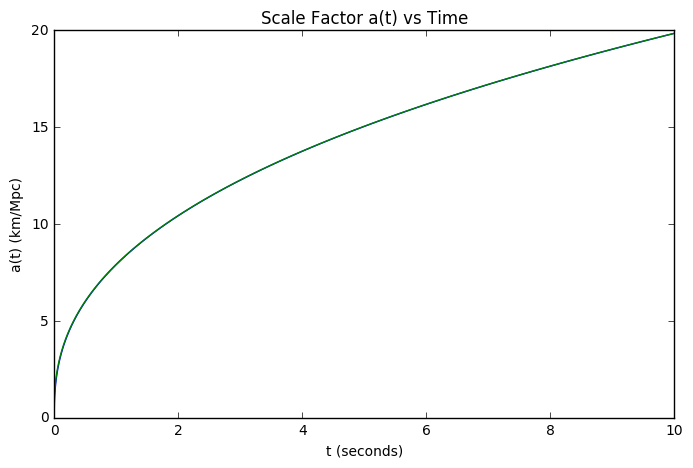

In [21]:
plt.plot(t, a(t))
plt.plot(t, solution)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.xlabel('t (seconds)')
plt.ylabel('a(t) (km/Mpc)')
plt.title('Scale Factor a(t) vs Time')

Both functions overlay eachother perfectly and therefore are hard to distinguish in this graph.